## Minerando Dados - A maior comunidade de Data Science do Brasil
www.minerandodados.com.br

### Análise de Sentimentos usando Machine Learning
-  Criando modelos para análise de sentimentos de tweets
- Teste com Modelo usando tag de negações
- Teste com Modelo usando Bigrams

In [1]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [2]:
# descobrindo qual diretório está fixado, lembrar que o formato é com  C:\\nome\\nome\\  
import os
os.getcwd()

# para modificar o diretório ...
# os.chdir('/')

'C:\\Users\\particular\\SERIQUE2'

In [3]:
dataset = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
Unnamed: 0                   8199 non-null int64
Created At                   8199 non-null object
Text                         8199 non-null object
Geo Coordinates.latitude     104 non-null float64
Geo Coordinates.longitude    104 non-null float64
User Location                5489 non-null object
Username                     8199 non-null object
User Screen Name             8199 non-null object
Retweet Count                8199 non-null int64
Classificacao                8199 non-null object
Observação                   1 non-null object
Unnamed: 10                  0 non-null float64
Unnamed: 11                  0 non-null float64
Unnamed: 12                  0 non-null float64
Unnamed: 13                  0 non-null float64
Unnamed: 14                  0 non-null float64
Unnamed: 15                  0 non-null float64
Unnamed: 16                  0 non-null float64
Unnamed: 17 

In [5]:
dataset.Text.head(50)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
5     " bom é bandido morto"\nDeputado Cabo Júlio é ...
6     "..E 25% dos mineiros dizem não torcer para ti...
7     "A gigantesca barba do mal" em destaque no cad...
8     "BB e governo de Minas travam disputa sobre de...
9     "com vcs bh fica pequena!" Belo Horizonte (pro...
10    "Daí a gente visita governador valadares"\n"Qu...
11    "É bonita e é bonita..." \n#latergram #ibituru...
12    "erro desconhecido" é mato! Aliás, é da secret...
13    "La La Land: Cantando Estações" arrasa no Glob...
14    "La La Land: Cantando Estações" arrasa no Glob...
15    "Los abusos, aun en el estado más sólido, son ...
16    "Mesmo sem muito dinheiro no caixa o governo d...
17    "Modelo de segurança será o nosso legado",

In [6]:
dataset[dataset.Classificacao=='Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [7]:
dataset[dataset.Classificacao=='Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [8]:
dataset[dataset.Classificacao=='Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

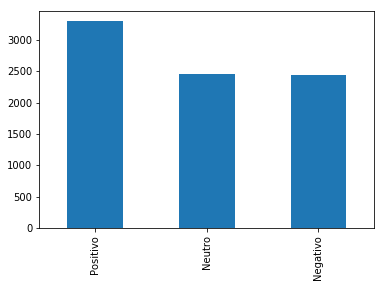

In [9]:
%matplotlib inline 
dataset.Classificacao.value_counts().plot(kind='bar')

In [10]:
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

# Pré-Processamento dos Dados
- Remove linhas duplicadas na base de dados
- Problema na coleta dos dados.
- Remove Stopwords
- Faz Stemming nos dados
- Remove caracteres indesejados como links, pontuação etc.

In [11]:
dataset.drop_duplicates(['Text'], inplace=True)

In [12]:
dataset.Text.count()

5765

### Separando tweets e suas Classes

In [13]:
tweets = dataset['Text']
classes = dataset['Classificacao']

### Instala bibliotecas e baixa a base de dados

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\particular\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\particular\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

### Funções de Pre-processamento de dados

In [ ]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [ ]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

### Entenda como funciona cada função

In [ ]:
RemoveStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!') 

In [ ]:
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!') 

In [ ]:
Limpeza_dados('Assista aqui o video do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

### Aplica as 3 funções de Pre-processamento nos dados

In [ ]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [ ]:
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assita o video aqui https:// :)')

#### Visualize os dados e veja como ficou após o pré-processamento

In [ ]:
tweets[:50]

## Criando o modelo
###  Instancia o objeto que faz a vetorização dos dados de texto


In [ ]:
vectorizer = CountVectorizer(analyzer="word")
# vectorizer

#### Aplica o vetorizador nos dados de texto 

In [ ]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)
#print(freq_tweets.toarray())
 

In [ ]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)
# print(freq_tweets.vocabulary_)

#### Formato (Linhas, Colunas) da matriz

In [ ]:
freq_tweets.shape

#### Matriz

In [ ]:
freq_tweets.A

#### Testando o modelo com algumas instâncias simples

In [ ]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

#### Aplica a função de Pré-processamento nos dados

In [ ]:
testes = [Preprocessing(i) for i in testes]
 

In [ ]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)
 

In [ ]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)
 

In [ ]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

Função de Tags de Negações
Acrescenta uma tag _NEG encontrada após um 'não'.
Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
Exemplos:
Eu gosto de cachorros, positivo.
Eu não gosto de cachorros, negativo.

In [ ]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

#### Exemplos de utilização da tag de negações

In [ ]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

In [ ]:
marque_negacao('Eu Não gosto do partido, e também não votaria novamente nesse governante!')

Criando modelos com Pipelines
Pipelines são interessantes para reduzir código e automatizar fluxos

In [ ]:
from sklearn.pipeline import Pipeline

pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

#### Pipeline que atribui tag de negacoes nas palavras

In [ ]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [ ]:
pipeline_simples.steps

#### Gera o modelo de negações

In [ ]:
pipeline_negacoes.fit(tweets,classes)

#### Etapas do pipeline

In [ ]:
pipeline_negacoes.steps

# Validando os Modelos com Validação Cruzada
- Fazendo o cross validation do modelo

In [ ]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

- Medindo a acurácia média do modelo

In [ ]:
metrics.accuracy_score(classes,resultados)

- Medidas de validação do modelo
 

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

- Matriz de confusão
 

In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

# Modelo com a Tag de Negações
 

In [ ]:
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

- Medindo a acurácia média do modelo
 

In [ ]:
metrics.accuracy_score(classes,resultados)

- Matriz de confusão
 

In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

## Avaliando modelo com Bigrams
 

'eu gosto', 'gosto do' , 'do brasil'
 

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)
 

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)
 

In [ ]:
metrics.accuracy_score(classes,resultados)
 

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))
 

In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

# Considerações Finais
- Considere aumentar a quantidade de dados de treino.

- Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.

- Considere alterar os parâmetros do algoritmo.

### www.minerandodados.com.br - A maior comunidade de Data Science do Brasil